
# Análise de Dados: Aprendizado de Máquina, Agrupamento


# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Flores 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). 

In [29]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

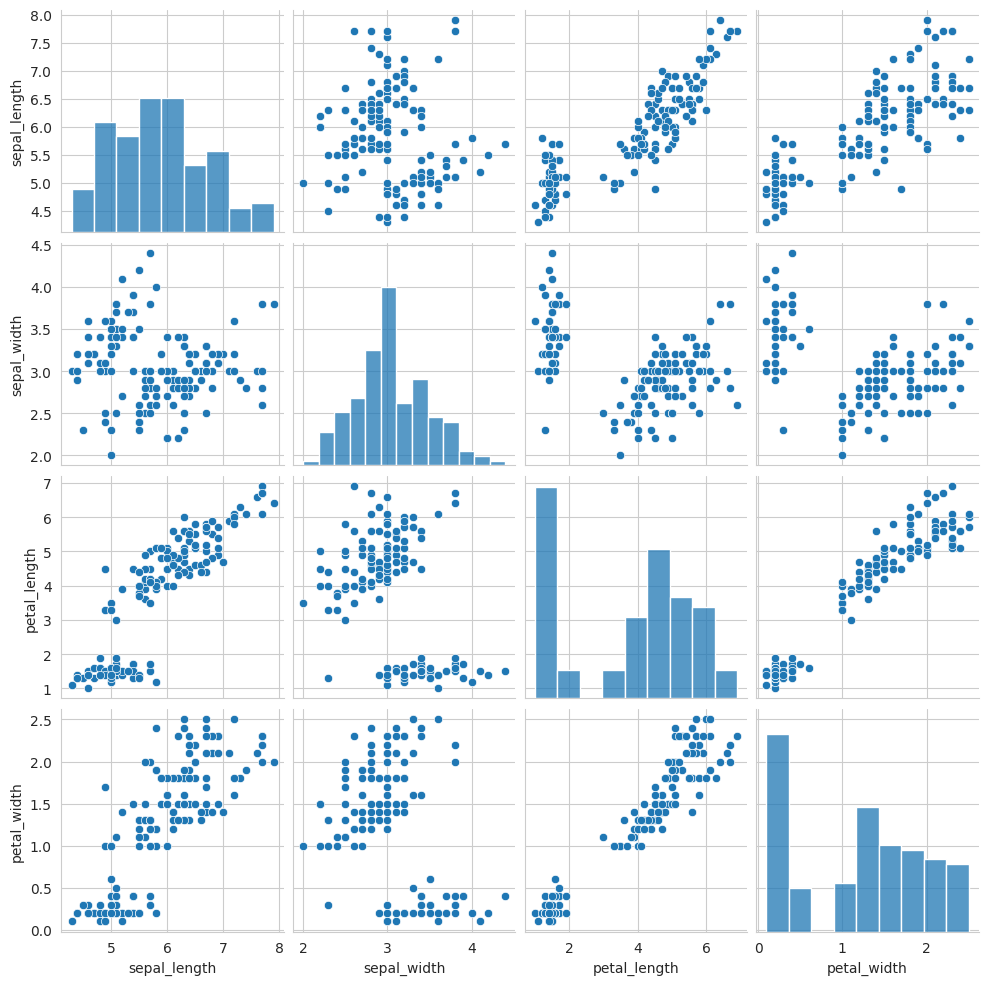

In [32]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris)

**Comentário:** nota-se um vão entre as iris, um grupo menor, enquanto a maioria são maiores.

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes

In [33]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [34]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [37]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters= 10)
model = model.fit(iris)

In [39]:
model.__dict__

{'n_clusters': 10,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 '_tol': 0.00011356176666666667,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 8,
 'cluster_centers_': array([[6.63333333, 3.03333333, 4.63333333, 1.45833333],
        [4.70454545, 3.12272727, 1.41363636, 0.2       ],
        [5.8       , 2.83181818, 4.32272727, 1.34090909],
        [6.76666667, 3.22222222, 5.82222222, 2.32222222],
        [5.24285714, 3.66785714, 1.5       , 0.28214286],
        [5.39230769, 2.43846154, 3.65384615, 1.12307692],
        [7.57777778, 3.1       , 6.42222222, 2.04444444],
        [6.3       , 3.33333333, 5.43333333, 2.33333333],
        [6.61428571, 2.94285714, 5.44285714, 1.98571429],
        [6.01666667, 2.70555556, 4.98333333, 1.77222222]]),


In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [41]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters= i)
    model = model.fit(iris)
    wcss.append(model.inertia_)

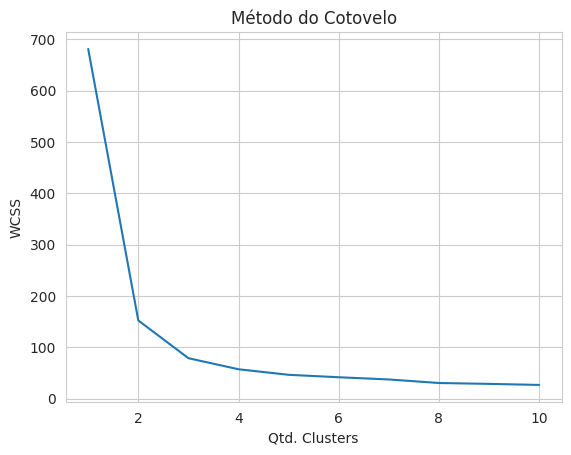

In [42]:
with sns.axes_style('whitegrid'):
    grafico = sns.lineplot(x=range(1,11), y=wcss, markers='8')
    grafico.set(title = 'Método do Cotovelo', ylabel = 'WCSS', xlabel= 'Qtd. Clusters')

Comentario: 6 parece ser o número ideal de clusters

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [43]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,0
1,6
2,6
3,6
4,0


In [44]:
clusters_df = pd.concat([iris,clusters], axis=1)
clusters_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,6
2,4.7,3.2,1.3,0.2,6
3,4.6,3.1,1.5,0.2,6
4,5.0,3.6,1.4,0.2,0


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

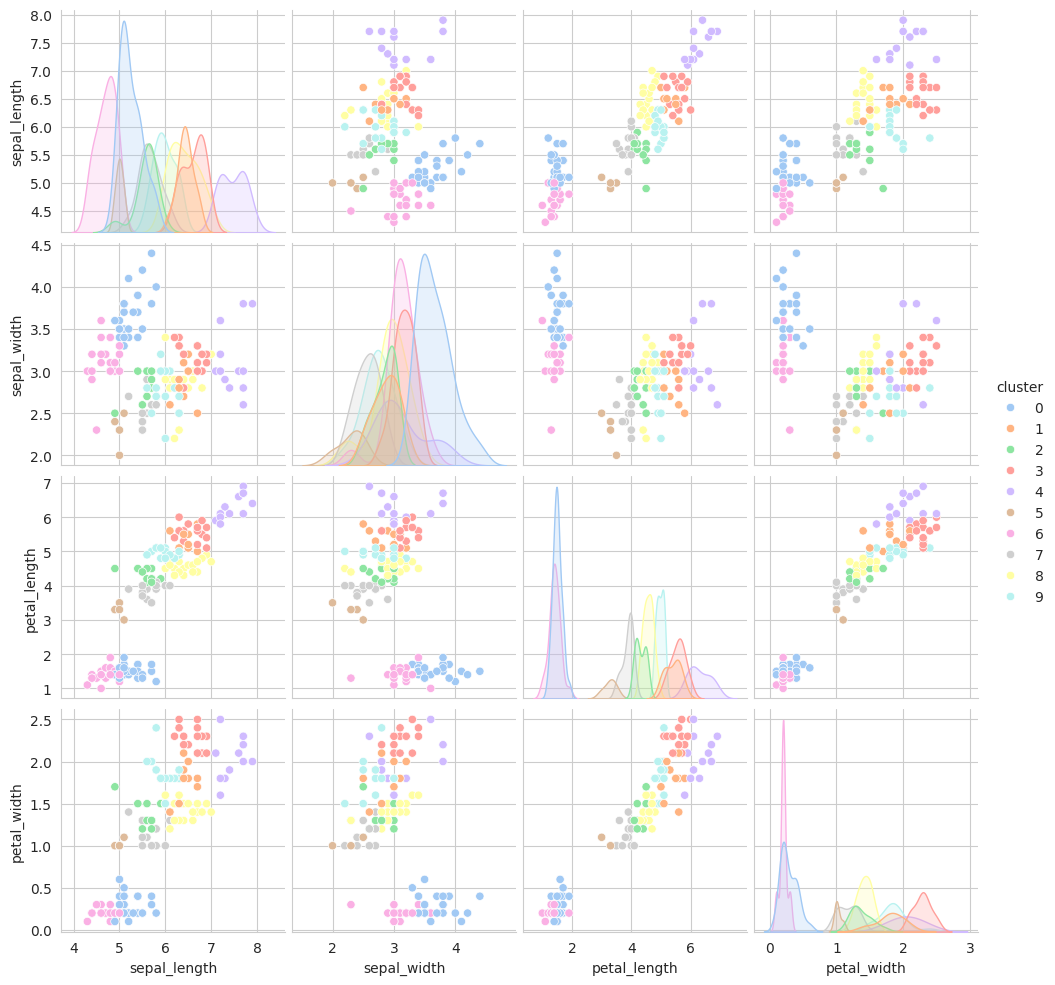

In [45]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clusters_df, hue='cluster', palette="pastel")

**Comentário:** 5 a 6 clusters possuem médias melhores 

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [47]:
clusters_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0


In [48]:
nova_flor = np.array([5.1, 3.5, 1.4, 0.2])

In [49]:
cluster = model.predict(nova_flor.reshape(1,-1))
cluster

c:\Users\Gabriel Canuto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

---